<center>
<a href="http://www.insa-toulouse.fr/" ><img src="http://www.math.univ-toulouse.fr/~besse/Wikistat/Images/logo-insa.jpg" style="float:left; max-width: 120px; display: inline" alt="INSA"/></a> 

<a href="http://wikistat.fr/" ><img src="http://www.math.univ-toulouse.fr/~besse/Wikistat/Images/wikistat.jpg" style="float:right; max-width: 250px; display: inline"  alt="Wikistat"/></a>
</center>

# [Scénarios d'Exploration Statistique](https://github.com/wikistat/Exploration)

# Initiation à l'AFCM avec <a href="https://cran.r-project.org/"><img src="https://cran.r-project.org/Rlogo.svg" style="max-width: 40px; display: inline" alt="R"/></a>
# Généralisation de l'AFC et exemples élémentaires
#### Résumé 
Comparaison entre des analyses des correspondances appliquées à une table de contingence, un tableau disjonctif complet et un tableau de Burt comme généralisation de l'[Analyse Factorielle des Correspondances](http://wikistat.fr/pdf/st-m-explo-afc.pdf) (AFC) pour définir  l'[Analyse Factorielle Multiple des Correspondances](http://wikistat.fr/pdf/st-m-explo-afcm.pdf). Exemple d'AFCM élémentaire et AFCM de variables avec interactions.
Utilisation du package [`FactoMineR`](http://factominer.free.fr/).
## 1 [AFCM](http://wikistat.fr/pdf/st-m-explo-afcm.pdf) et  [AFC](http://wikistat.fr/pdf/st-m-explo-afc.pdf) de données fictives
### 1.1 Les données
Six invividus identifiés de `un` à `six`sont questionnés. Ils indiquent leur `CSP` (1 à 4) et leur sport préféré: `R`ou `T`.

In [29]:
matFic <- read.table("afcfic.dat", header = TRUE, row.names = 1, as.is = "stringsAsFactors")
matFic

Warning message in read.table("afcfic.dat", header = TRUE, row.names = 1, as.is = "stringsAsFactors"):
“certaines des colonnes nommées dans 'as.is' sont introuvables”


,csp,sport
,<fct>,<fct>
un,csp1,R
deux,csp2,R
trois,csp2,S
quatre,csp3,S
cinq,csp3,T
six,csp4,T


### 1.2 Les tableaux
**Q** Quel est le tableau ci-dessous ?  

**R** 

In [30]:
T <- table(matFic$csp, matFic$sport)
T

      
       R S T
  csp1 1 0 0
  csp2 1 1 0
  csp3 0 1 1
  csp4 0 0 1

**Q** Quel est le tableau ci-dessous ?

In [31]:
library(FactoMineR)
D <- tab.disjonctif(matFic)
D

,csp1,csp2,csp3,csp4,R,S,T
un,1,0,0,0,1,0,0
deux,0,1,0,0,1,0,0
trois,0,1,0,0,0,1,0
quatre,0,0,1,0,0,1,0
cinq,0,0,1,0,0,0,1
six,0,0,0,1,0,0,1


**Q** Quel est le tableau ci-dessous? De quels blocs est-il constitué?

In [32]:
B <- t(D)%*%D
B

,csp1,csp2,csp3,csp4,R,S,T
csp1,1,0,0,0,1,0,0
csp2,0,2,0,0,1,1,0
csp3,0,0,2,0,0,1,1
csp4,0,0,0,1,0,0,1
R,1,1,0,0,2,0,0
S,0,1,1,0,0,2,0
T,0,0,1,1,0,0,2


### 1.3 Analyses des correspondances
Analyse multiple des correspondances définie par généralisation de l'analyse factorielle des correspondances.
#### AFC de T
**Q** Quelles sont les ACPs définissant l'AFC de `T`?

,eigenvalue,percentage of variance,cumulative percentage of variance
dim 1,0.75,75,75
dim 2,0.25,25,100


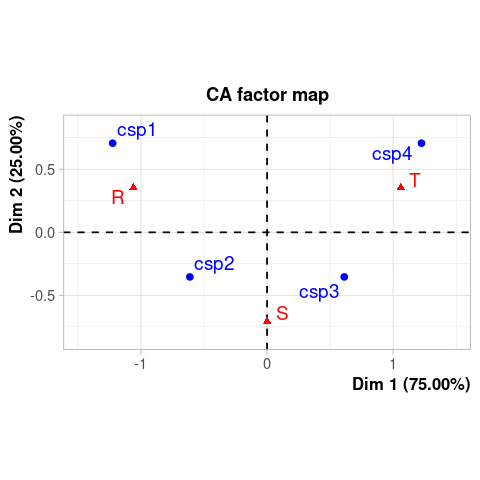

In [33]:
options(repr.plot.width = 4, repr.plot.height = 4)
CA(T)$eig

**Q** Que sont plus précisément les % exprimés sur les axes ? Noter les valeurs propres.
#### AFC de B

,eigenvalue,percentage of variance,cumulative percentage of variance
dim 1,8.705127e-01,4.974358e+01,49.74358
dim 2,5.625000e-01,3.214286e+01,81.88644
dim 3,2.500000e-01,1.428571e+01,96.17215
dim 4,6.250000e-02,3.571429e+00,99.74358
dim 5,4.487298e-03,2.564170e-01,100.00000
dim 6,7.613143e-33,4.350368e-31,100.00000


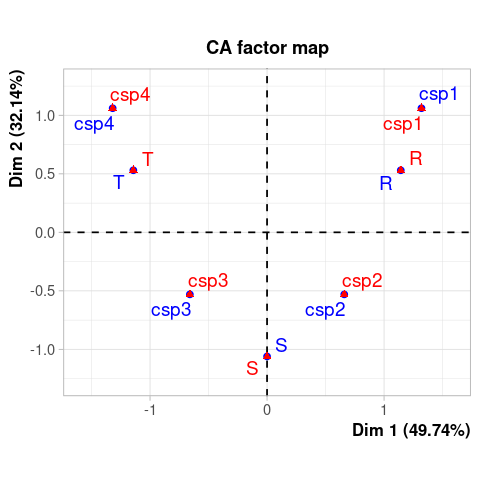

In [34]:
CA(B)$eig

**Q** Pourquoi les modalités sont-elles doublées dans la représentation?

**Q** Quelle signification des pourcentages sur les axes?

**Q** Retrouver les valeurs propres  de AFC(B) à partir de celles de AFC(T).
#### AFC de D

,eigenvalue,percentage of variance,cumulative percentage of variance
dim 1,0.9330127,37.320508,37.32051
dim 2,0.7500000,30.000000,67.32051
dim 3,0.5000000,20.000000,87.32051
dim 4,0.2500000,10.000000,97.32051
dim 5,0.0669873,2.679492,100.00000


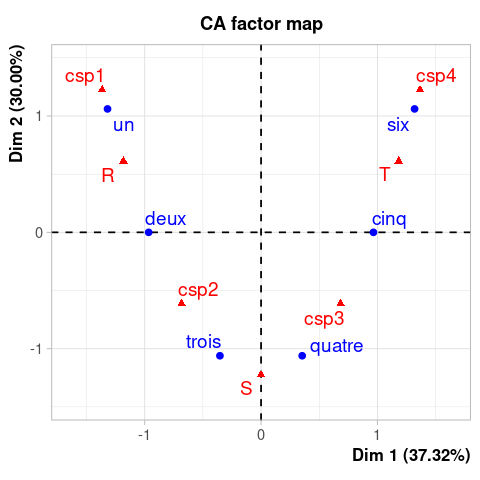

In [35]:
CA(D)$eig

**Q** Qu'apporte en plus l'AFC(D) ?

**Q** Quelle signification des pourcentages sur les axes ?

**Q** Retrouver les valeurs propres de AFC(D) à partir de celles de AFC(T).

**Q** Question subsidiaire : pourquoi les points sont-ils projetés sur une parabole nommée dans la littérature: *horseshoe* ou effet Guttman?

## 2 Races de chiens
Nous nous proposons de représenter à l'aide d'une AFCM les propriétés de races de chiens afin d'évaluer leur compatibilité avec la fonction de ces chiens, considérée comme variable supplémentaire.
### 2.1 Les données
Les données sont extraites de Bréfort (1982). Elles contiennent le descriptif des qualités de 27 races de chien: tailles (`T`), poids (`P`), vélocité (`V`), intelligence (`I`), codées sur trois modalités (`-` faible, `+` moyen, `++` fort), affection (`Af`) et agressivité (`Ag`) sur deux modalités (`-` faible, `+` forte), enfin la fonction sur trois modalités: `Com` (compagnie), `Cha` (chasse), `Uti` (utilité). Les modalités étaient initialement codées par des entiers mais l'obtention de graphes nécessite un recodage explicite des modalités avec des libellés facilement identifiables. Ce recodage a été opéré dans SAS.

La première colonne identifie la *race* du chien donc chaque individu.

In [36]:
chiens <- read.csv("chiens.csv", row.names = 1)
chiens
summary(chiens)

,taille,poids,velocite,intellig,affect,agress,fonction
,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>
beaucero,T++,P+,V++,I+,Af+,Ag+,Uti
basset,T-,P-,V-,I-,Af-,Ag+,Cha
ber_alle,T++,P+,V++,I++,Af+,Ag+,Uti
boxer,T+,P+,V+,I+,Af+,Ag+,Com
bull-dog,T-,P-,V-,I+,Af+,Ag-,Com
bull-mas,T++,P++,V-,I++,Af-,Ag+,Uti
caniche,T-,P-,V+,I++,Af+,Ag-,Com
chihuahu,T-,P-,V-,I-,Af+,Ag-,Com
cocker,T+,P-,V-,I+,Af+,Ag+,Com


    taille             poids             velocite           intellig        
 Length:27          Length:27          Length:27          Length:27         
 Class :character   Class :character   Class :character   Class :character  
 Mode  :character   Mode  :character   Mode  :character   Mode  :character  
    affect             agress            fonction        
 Length:27          Length:27          Length:27         
 Class :character   Class :character   Class :character  
 Mode  :character   Mode  :character   Mode  :character  

### 2.2 AFCM avec `FactoMineR`
La librairie `FactoMineR` est particulièrement conçue pour exécuter et représenter des analyses factorielles des correspondances.

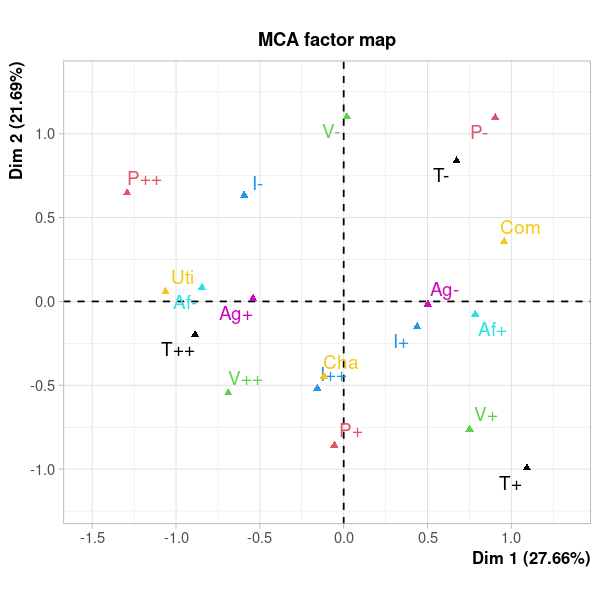

In [37]:
library(FactoMineR)
# afcm avec la fonction des chiens en supplémentaire
afcm <- MCA(chiens, quali.sup = 7, graph = F)
options(repr.plot.width = 5, repr.plot.height = 5)
# plot(afcm, invisible = "ind")  # with a version of R < 4.0
plot(afcm, invisible = "ind", habillage = "quali")  # with a recent version of R >= 4.0

**Q** Quelle AFC a été calculée pour produire le graphe ci-dessus ?

**Q** Quelle signification des pourcentages sur les axes ?

**Q** Quelle interprétation possible ?

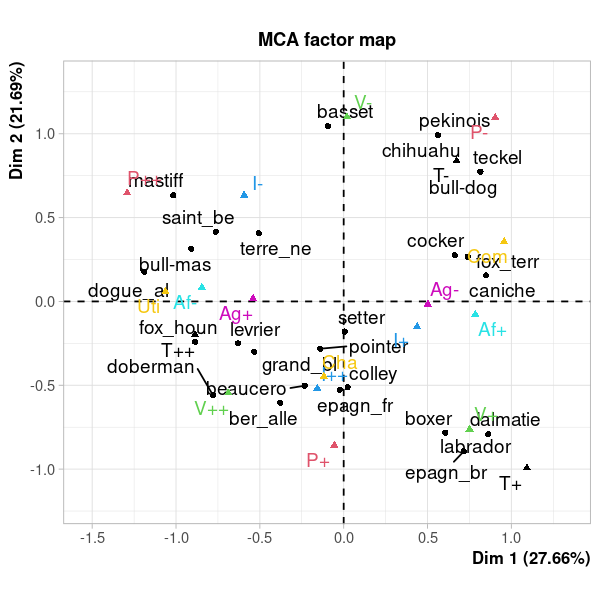

In [38]:
plot(afcm, choix = "ind", habillage = "quali")

**Q** Quelle AFC a été exécutée pour obtenir le graphe ci-dessus ?

## 3 Diagnostic du cancer du sein
L'objet de cet exemple est de mettre en évidence les limitations de l'AFCM ou les précautions à prendre pour traiter des données complexes. L'AFCM analyse le seul tableau de Burt croisant (tables de contingence) les variables deux à deux. Par construction, cette méthode ne prend donc pas en compte la présence possible d'interactions d'ordre supérieur à deux entre les variables. Cela peut être trompeur.
### 3.1 Les données
Les données relatives à plusieurs variables qualitatives sont représentées habituellement sous la forme d'une table de contingence *complète*. L'exemple ci-dessous est extrait de Bishop et al. (1976). Il décrit les résultats partiels d'une enquête ancienne réalisée dans trois centres hospitaliers (Boston, Glamorgan, Tokio) sur des patientes atteintes d'un cancer du sein. On se propose d'étudier la survie de ces patientes trois ans après le diagnostic.
En plus de cette information, quatre autres variables sont
documentées pour chacune des patientes :
- le centre de diagnostic, 
- la tranche d'âge, 
- le degré d'inflammation chronique petite ou grande,
- l'apparence relative (bénigne ou maligne) de la tumeur.

Le croisement de toutes les variables permet de construire la *table de contingence complète* ci-dessous. 

  
Centre | Age | Survie | Petite | Inflammation | Grande | Inflammation
-------| --- | ------ | ------ | ------------ | ------ | ------------ 
   |     |        |   **App  Maligne**  |  **App Benigne**    |    **App Maligne**   | **App Benigne**
Tokyo	|  <50	| non |9|7|4|3 
	|		| oui |26|68|25|9
	| 50-69	| non |9|9|11|2
	|		| oui |20|46|18|5
	| >70		| non |2|3|1|0
	|		| oui |1|6|5|1
Boston	|  <50	| non |6|7|6|0
	|		| oui |11|24|4|0
	| 50-69	| non |8|20|3|2
	|		| oui |18|58|10|3
	| >70		| non |9|18|3|0
	|		| oui |15|26|1|1
Glamorgan|  <50	| non |16|7|3|0
	|		| oui |16|20|8|1
	| 50-69	| non |14|12|3|0
	|		| oui |27|39|10|4
	| >70		| non |3|7|3|0
	|		| oui |12|11|4|1


**Q** Que signifie chaque entier dans cette table?

L'objectif de cette étude est une analyse descriptive (AFCM) 
de cette table en recherchant à mettre en évidence les facteurs 
de décès. 

In [39]:
diagnos <- read.csv("diagnos.csv")
summary(diagnos[, 1:6])

      eff           centre              age               survie         
 Min.   : 0.00   Length:72          Length:72          Length:72         
 1st Qu.: 3.00   Class :character   Class :character   Class :character  
 Median : 7.00   Mode  :character   Mode  :character   Mode  :character  
 Mean   :10.61                                                           
 3rd Qu.:14.25                                                           
 Max.   :68.00                                                           
    inflam             appar          
 Length:72          Length:72         
 Class :character   Class :character  
 Mode  :character   Mode  :character  
                                      
                                      
                                      

**Q** Quel est le graphique ci-dessous ? Aide-t-il à la compréhension ?

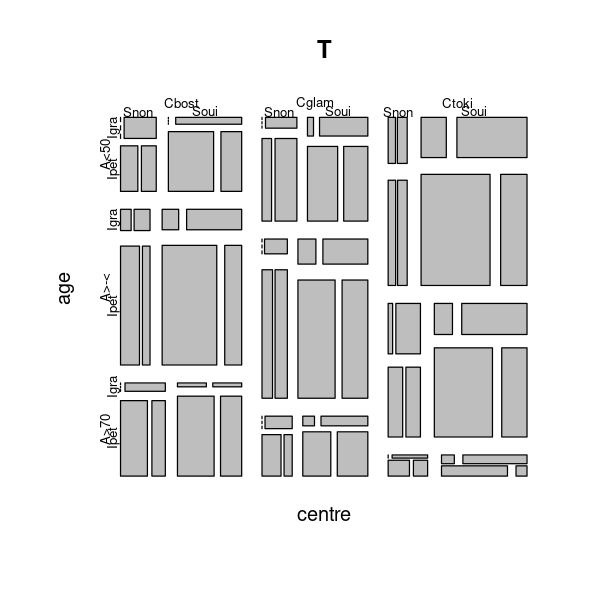

In [40]:
T <- xtabs(eff ~ centre + age + survie + inflam + appar, diagnos)
mosaicplot(T)

### 3.2 AFCM des variables simples
Même si la table de contingence complète permet de reconstruire toute l'information à tous le sniveaux d'interaction entre les variables, l'AFCM, obtenue par AFC du tableau de Burt, ne prend nécessairement en compte que le croisement des variables 2 à 2.

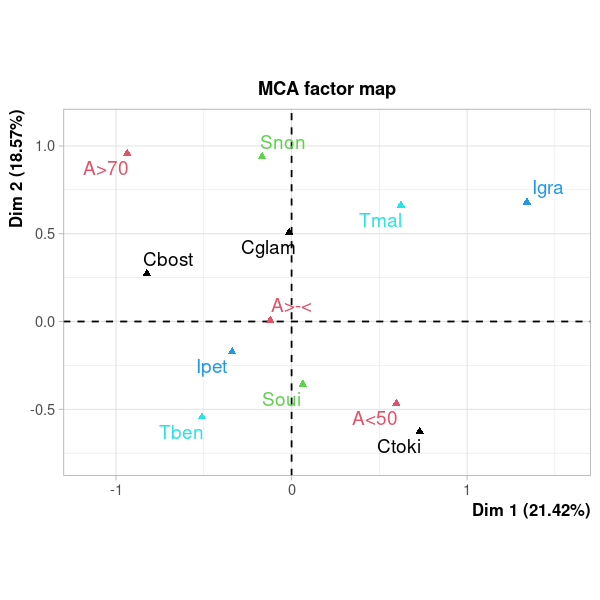

In [41]:
library(FactoMineR)
# fréquences "biaisées" car le programme
# ne supporte pas des fréquences nulles
freq <- diagnos[, 1] + .0001
afcm <- MCA(diagnos[, 2:6], row.w= freq, graph = F)
plot(afcm, invisible = "ind", habillage = "quali")

**Q** Interpréter le deuxième axe. A la lumière de ce graphique, quels sont les facteurs de décès ? 

**Q** Quelle est influence de l'âge ? Et surtout celle du centre ? 

**Q** Influence du centre ou déséquilibre des distributions des âges entre les centres ? Commnent répondre à cette question ?

### 3.3 AFCM des variables croisées
Le graphique de l'analyse précédente suggère l'influence 
de l'âge mais aussi celle du centre de diagnostic dans les risques de 
décès avant trois ans. Pour expliciter ces liaisons, les données 
sont reconsidérées de la façon suivante:
- les variables `centre` et `age` sont croisées pour construire une variable `agecent` à 9 modalités,
- les variables `inflam` et `appar` sont croisées également pour définir la variable `histo` à 4 modalités.


In [42]:
summary(diagnos)

      eff           centre              age               survie         
 Min.   : 0.00   Length:72          Length:72          Length:72         
 1st Qu.: 3.00   Class :character   Class :character   Class :character  
 Median : 7.00   Mode  :character   Mode  :character   Mode  :character  
 Mean   :10.61                                                           
 3rd Qu.:14.25                                                           
 Max.   :68.00                                                           
    inflam             appar             agecent             histo          
 Length:72          Length:72          Length:72          Length:72         
 Class :character   Class :character   Class :character   Class :character  
 Mode  :character   Mode  :character   Mode  :character   Mode  :character  
                                                                            
                                                                            
                    

Ce qui conduit au mosaicplot guère plus explicite:

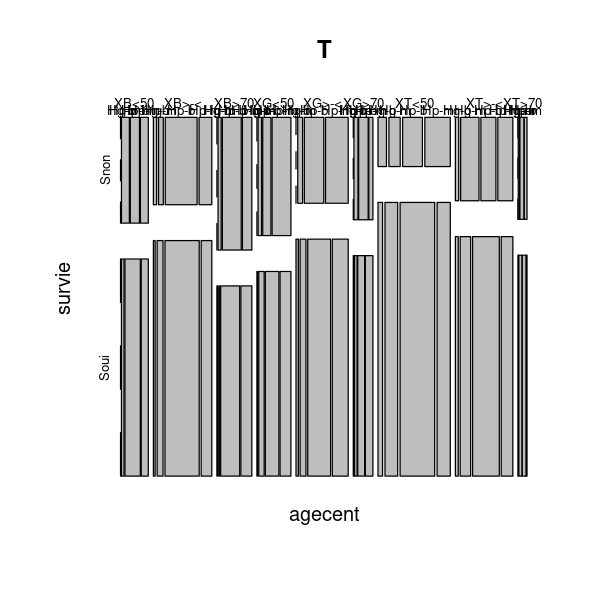

In [43]:
T <- xtabs(eff ~ agecent + survie + histo, diagnos)
mosaicplot(T)

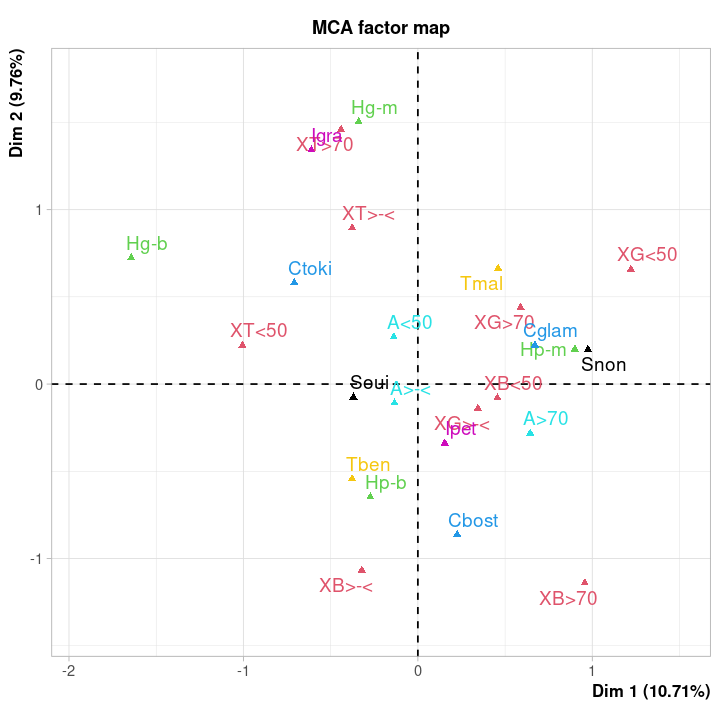

In [44]:
afcm <- MCA(diagnos[, 2:8], quali.sup = c(1, 2, 4, 5), row.w = freq, graph = F)
options(repr.plot.width = 6, repr.plot.height = 6)
plot(afcm, invisible = "ind", habillage = "quali")

**Q** Repérer les modalités de la variable `agecent`. Comment celles-ci sont-elles positionnées par rapport à celles de la variable supplémentaire `centre`; puis de celles de la variable `age`?

**Q** Même chose pour les variables `histo`, `imflam`, `appar`.

**Q** Quels sont, pour ce graphique, les principaux facteurs de risque ?

**Q** Est-ce compatible avec le graphique de l'AFCM précédente ?